In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [17]:
df = pd.read_csv("Women_s_E-Commerce_Clothing_Reviews_1594_1.csv" , sep = ';')

In [18]:
df.head()

,Unnamed: 0,Clothing.ID,Age,Title,Review.Text,Rating,Recommended.IND,Positive.Feedback.Count,Division.Name,Department.Name,Class.Name
0,1,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,2,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,3,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,4,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,5,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing.ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review.Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended.IND          23486 non-null  int64 
 7   Positive.Feedback.Count  23486 non-null  int64 
 8   Division.Name            23472 non-null  object
 9   Department.Name          23472 non-null  object
 10  Class.Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [20]:
df.describe()

,Unnamed: 0,Clothing.ID,Age,Rating,Recommended.IND,Positive.Feedback.Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11743.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,1.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5872.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11743.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17614.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23486.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [21]:
df.isnull().sum()

Unnamed: 0                    0
Clothing.ID                   0
Age                           0
Title                      3810
Review.Text                 845
Rating                        0
Recommended.IND               0
Positive.Feedback.Count       0
Division.Name                14
Department.Name              14
Class.Name                   14
dtype: int64

In [22]:
df.dropna(subset = ['Review.Text' , 'Division.Name', 'Department.Name', 'Class.Name'], inplace = True)

In [23]:
df.fillna({'Title':'No title'} , inplace = True)

In [24]:
df.drop(['Unnamed: 0','Clothing.ID'],axis = 1, inplace = True)

In [25]:
df.shape

(22628, 9)

In [26]:
df.head()

,Age,Title,Review.Text,Rating,Recommended.IND,Positive.Feedback.Count,Division.Name,Department.Name,Class.Name
0,33,No title,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,No title,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### rating

In [27]:
df['Rating'].value_counts()

Rating
5    12527
4     4908
3     2823
2     1549
1      821
Name: count, dtype: int64

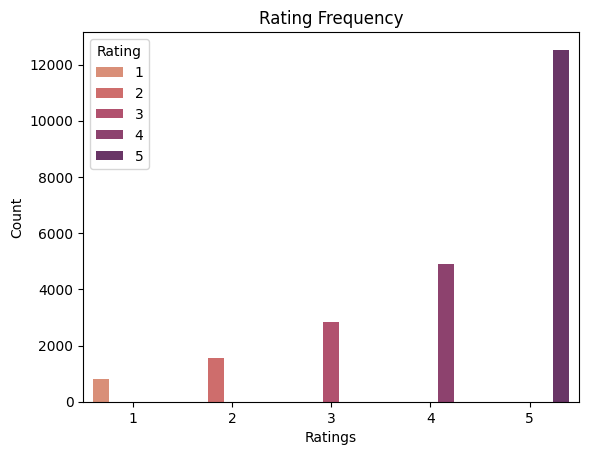

In [28]:
sns.countplot(x = 'Rating', data = df, palette = 'flare',hue = 'Rating')
plt.title('Rating Frequency')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

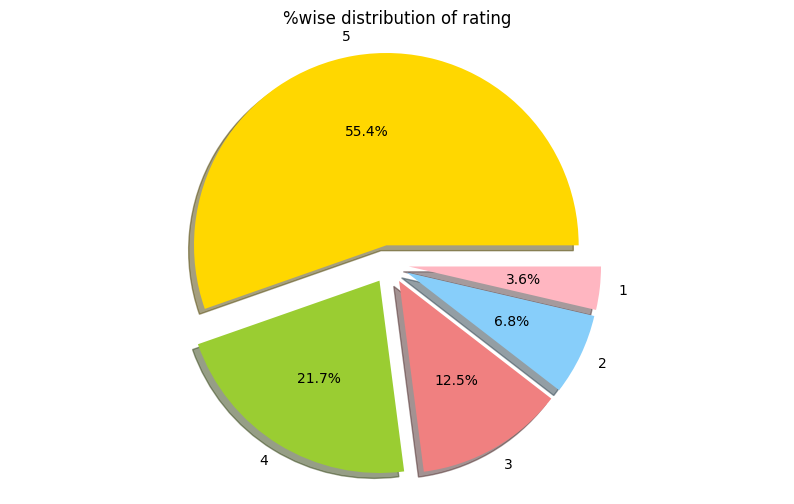

In [29]:
plt.figure(figsize=(10, 6))
labels = ['5','4','3','2','1']
sizes = df['Rating'].value_counts()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','lightpink']
explode = (0.1, 0.1, 0.1, 0.1, 0.1)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True) 
plt.title('%wise distribution of rating')
plt.axis('equal')
plt.show()

### department and division

In [30]:
df['Department.Name'].value_counts()

Department.Name
Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: count, dtype: int64

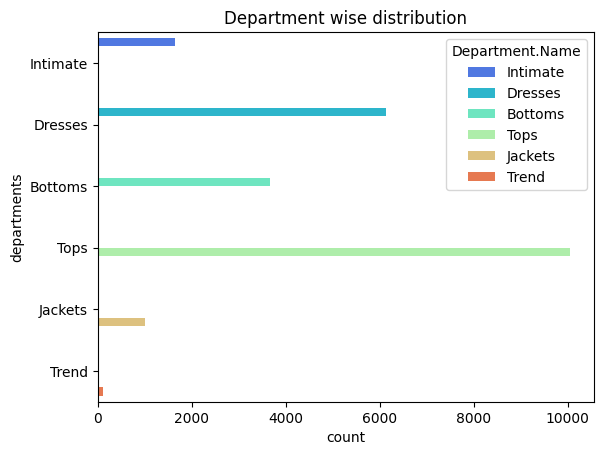

In [33]:
sns.countplot(y = 'Department.Name', data = df, palette = 'rainbow', hue = 'Department.Name' )
plt.title('Department wise distribution')
plt.xlabel('count')
plt.ylabel('departments')
plt.show()

In [34]:
df['Division.Name'].value_counts()

Division.Name
General           13365
General Petite     7837
Initmates          1426
Name: count, dtype: int64

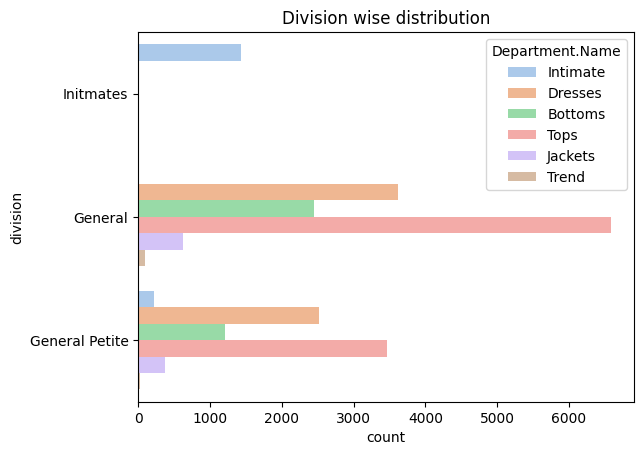

In [36]:
sns.countplot(y = 'Division.Name', data = df, palette = 'pastel', hue = 'Department.Name' )
plt.title('Division wise distribution')
plt.xlabel('count')
plt.ylabel('division')
plt.show()

### Age 

In [37]:
df['Age'].value_counts()

Age
39    1225
35     851
36     799
34     765
38     751
      ... 
93       2
90       2
86       2
99       2
92       1
Name: count, Length: 77, dtype: int64

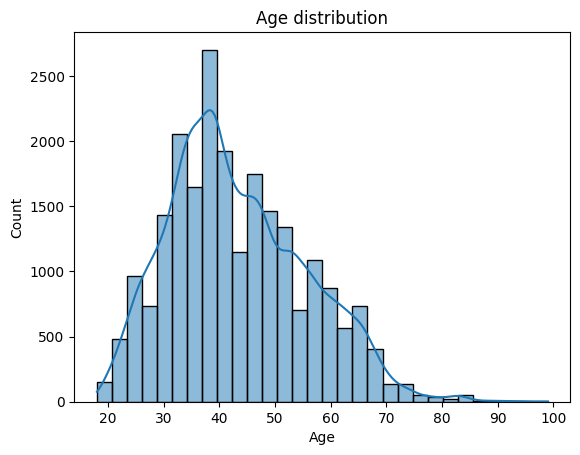

In [38]:
sns.histplot(df['Age'], bins = 30, kde = True)
plt.title('Age distribution')
plt.show()

### class name

In [39]:
df['Class.Name'].value_counts()

Class.Name
Dresses           6145
Knits             4626
Blouses           2983
Sweaters          1380
Pants             1350
Jeans             1104
Fine gauge        1059
Skirts             903
Jackets            683
Lounge             669
Swim               332
Outerwear          319
Shorts             304
Sleep              214
Legwear            158
Intimates          147
Layering           132
Trend              118
Casual bottoms       1
Chemises             1
Name: count, dtype: int64

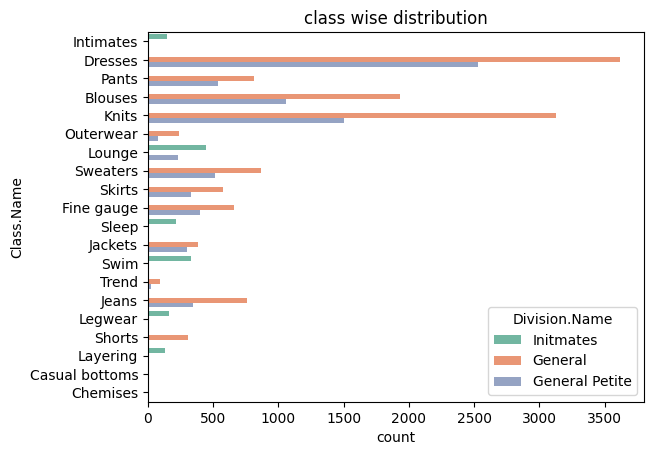

In [41]:
sns.countplot(y = 'Class.Name', data = df, hue = 'Division.Name', palette = 'Set2')
plt.title('class wise distribution')
plt.show()

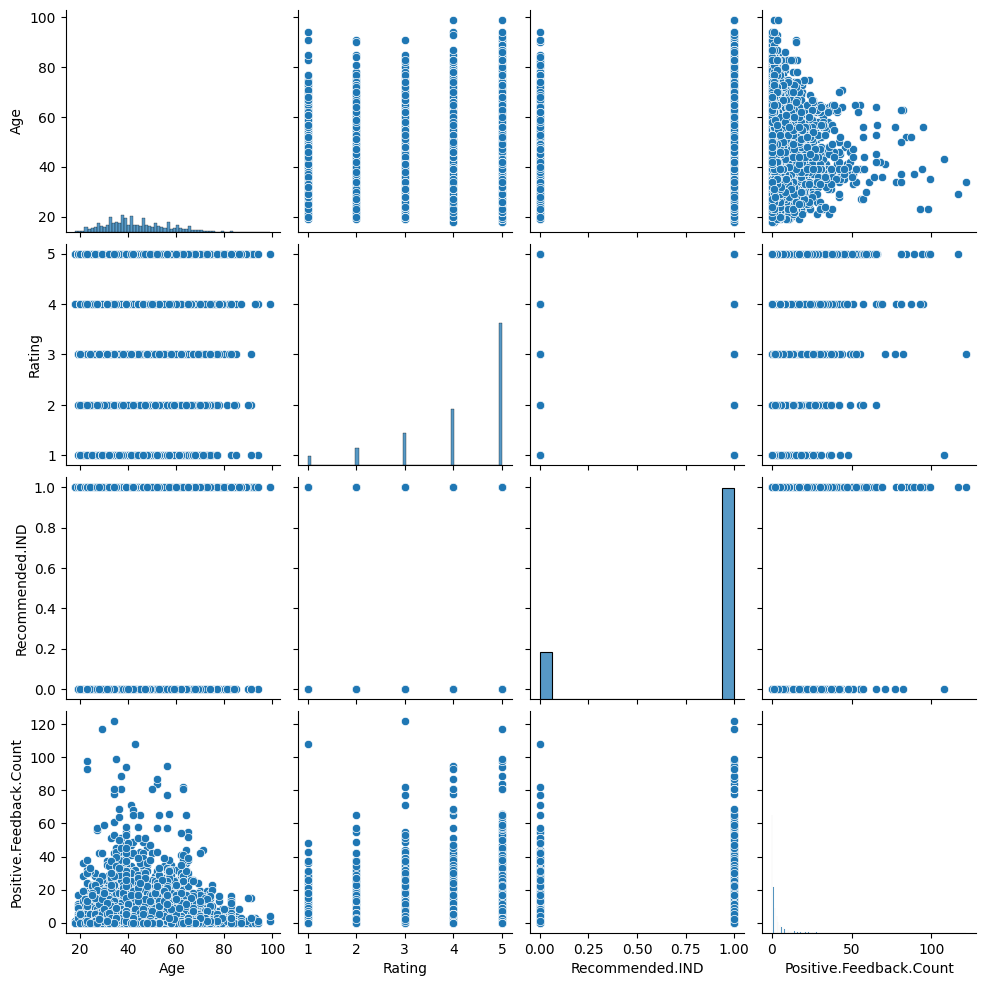

In [42]:
sns.pairplot(df)

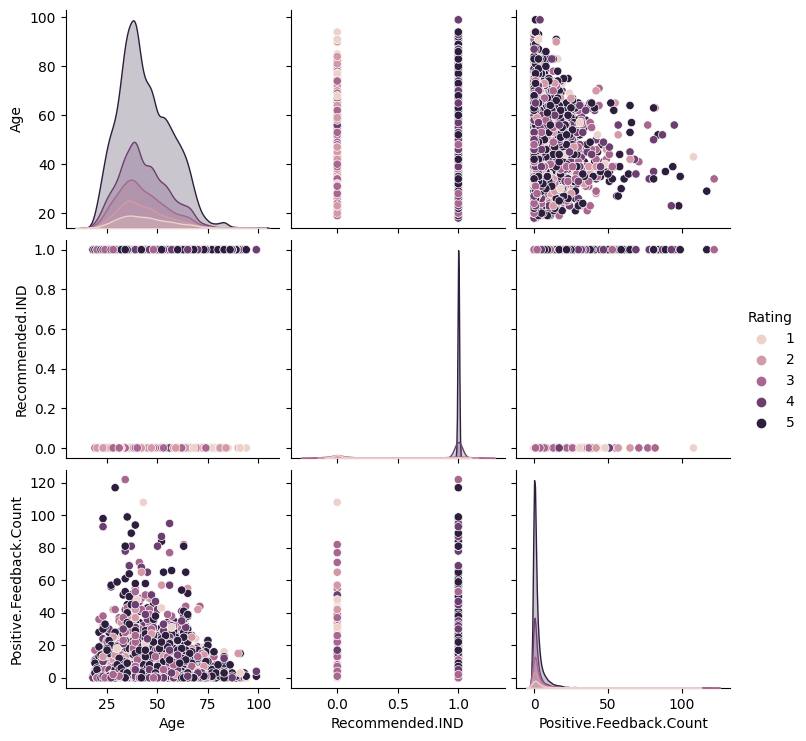

In [43]:
sns.pairplot(data = df, hue = 'Rating')

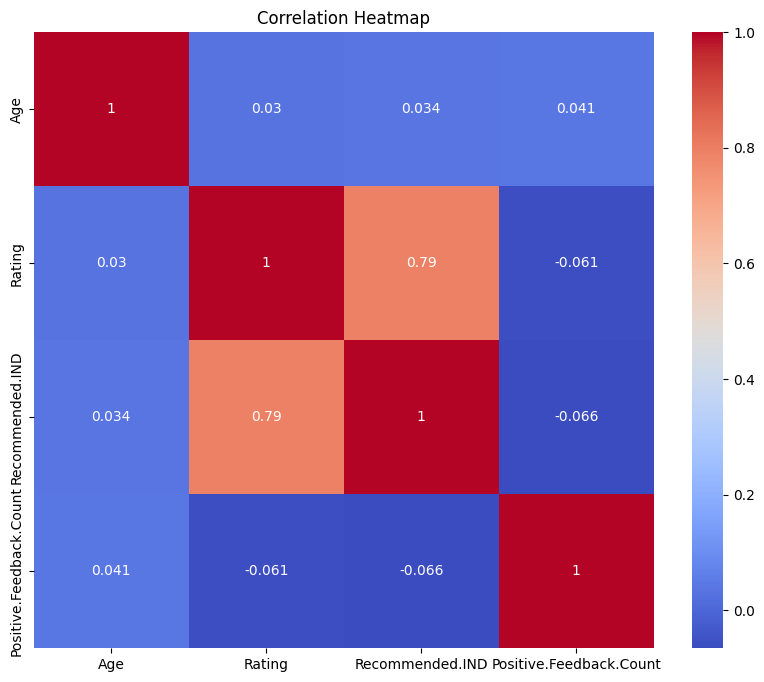

In [44]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Categorical Features

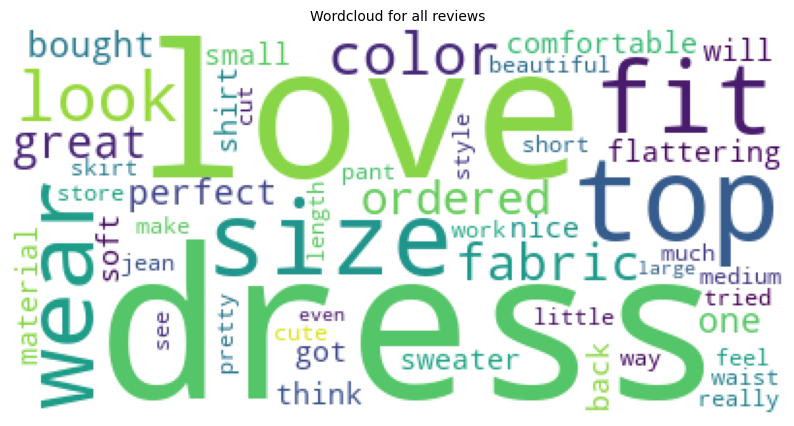

In [45]:
reviews = " ".join([review for review in df['Review.Text'].astype('str')])
wc = WordCloud(background_color='white', max_words=50)

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [46]:
neg_reviews = " ".join([review for review in df[df['Rating'] == 1]['Review.Text'].astype('str')])
neg_reviews = neg_reviews.lower().split()
neg_reviews = " ".join([review for review in df[df['Rating'] == 2]['Review.Text'].astype('str')])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in df[df['Rating'] == 4]['Review.Text'].astype('str')])
pos_reviews = pos_reviews.lower().split()
pos_reviews = " ".join([review for review in df[df['Rating'] == 5]['Review.Text'].astype('str')])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

KeyboardInterrupt: 

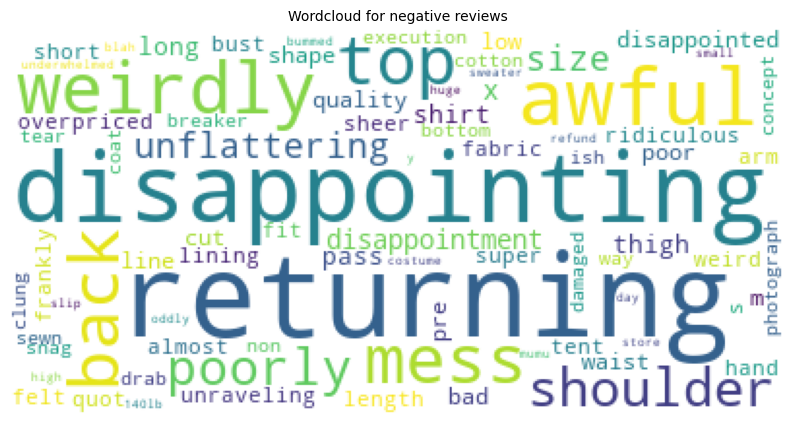

In [ ]:
wc = WordCloud(background_color = 'white', max_words = 80)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

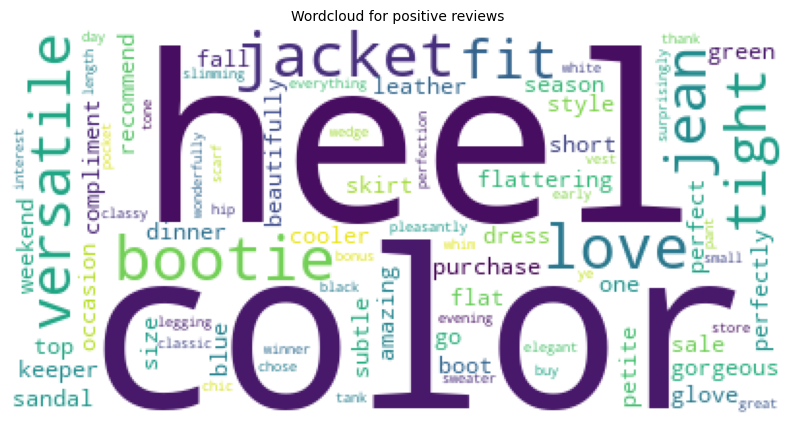

In [ ]:
wc = WordCloud(background_color = 'white', max_words = 80)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

### Preprocessing data

In [47]:
import nltk
import re
import pickle

In [48]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
nltk_data_dir = './nltk_data'
nltk.data.path.append(nltk_data_dir)

In [52]:
wordnet = WordNetLemmatizer()
corpus = []

In [53]:
def preprocess_text(rev):
    rev = re.sub('^a-zA-Z', ' ',rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [wordnet.lemmatize(word)for word in rev if word not in set(stopwords.words('english'))]
    rev = ' '.join(rev)
    return rev

In [54]:
df['Cleaned_Review_Text'] = df['Review.Text'].apply(preprocess_text)
df[['Review.Text', 'Cleaned_Review_Text']].head()

,Review.Text,Cleaned_Review_Text
0,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful - silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,"love dress! sooo pretty. happened find store, ..."
2,I had such high hopes for this dress and reall...,high hope dress really wanted work me. initial...
3,"I love, love, love this jumpsuit. it's fun, fl...","love, love, love jumpsuit. fun, flirty, fabulo..."
4,This shirt is very flattering to all due to th...,shirt flattering due adjustable front tie. per...


In [55]:
def label_sentiment(rating):
    if rating >= 4:
        return 1  # Positive
    elif rating == 3:
        return 0  # Neutral
    else:
        return -1  # Negative

In [56]:
df['Sentiment'] = df['Rating'].apply(label_sentiment)
df.head()

,Age,Title,Review.Text,Rating,Recommended.IND,Positive.Feedback.Count,Division.Name,Department.Name,Class.Name,Cleaned_Review_Text,Sentiment
0,33,No title,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful - silky sexy comfortable,1
1,34,No title,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"love dress! sooo pretty. happened find store, ...",1
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,high hope dress really wanted work me. initial...,0
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"love, love, love jumpsuit. fun, flirty, fabulo...",1
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,shirt flattering due adjustable front tie. per...,1


In [57]:
tfidf = TfidfVectorizer(max_features = 5000, ngram_range=(1,2))
X = tfidf.fit_transform(df['Cleaned_Review_Text']) #independent feature
y = df['Sentiment']  # dependent feature

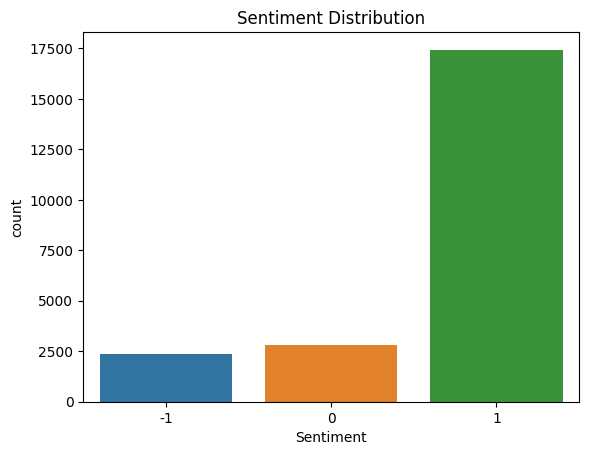

Sentiment
 1    17435
 0     2823
-1     2370
Name: count, dtype: int64

In [58]:
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()
df['Sentiment'].value_counts()

In [59]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

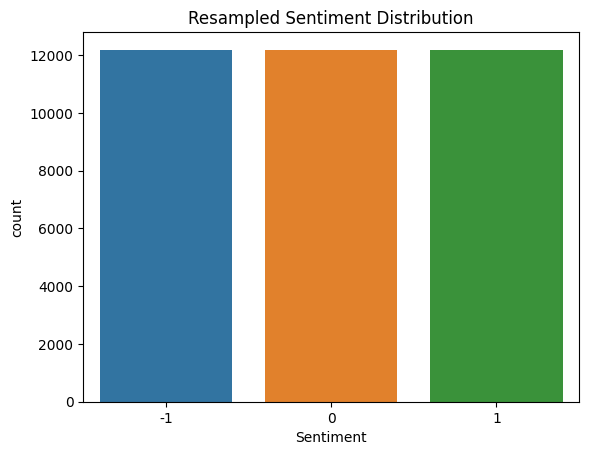

In [62]:
sns.countplot(x=y_train_res)
plt.title('Resampled Sentiment Distribution')
plt.show()

### model training

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [64]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

LogisticRegression()

In [65]:
y_pred = logreg.predict(X_test)

In [66]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 391,  241,   81],
       [ 244,  383,  203],
       [ 195,  472, 4579]])

In [67]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.7884813669170717
Precision: 0.8197910575875242
Recall: 0.7884813669170717
F1 Score: 0.801876634351025


In [69]:
pickle.dump(tfidf, open('sentimental_analysis_models/tfidf_vectorizer.pkl', 'wb'))
pickle.dump(smote, open('sentimental_analysis_models/smote.pkl', 'wb'))
pickle.dump(logreg, open('sentimental_analysis_models/log.pkl', 'wb'))